# Trimming

In [1]:
import numpy as np
from xml.etree import ElementTree
import cv2
from PIL import Image
import tensorflow as tf
import csv
import argparse
import os
import pandas as pd
import glob
import matplotlib.pyplot as plt
import pickle

%matplotlib inline

In [2]:
image_path = '../img'
#Please prepare target images.
image_path2 = '../calib'
#Please prepare calibration images.
save_path="../result_img"
#Please make an empty directory before execution.
save_path2="../result_calib"
#Please make an empty directory before execution.
option = "use_const"
#Trapezoid option.

In [3]:
def trim():
    global image_path,image_path2,save_path,save_path2
    images = glob.glob(image_path+'/*.jpg')

    print(images)

    for indx, fname in enumerate(images):
        img = cv2.imread(fname)
        img2=img[1500:2430,0:3239]
        img3=cv2.resize(img2,(416,128))
        img_size = (img3.shape[1], img3.shape[0])
        print(img_size)
        #plt.imshow(img3)
        print(save_path+"/"+str(indx)+".jpg")
        cv2.imwrite(save_path+"/"+str(indx)+".jpg",img3)
        images = glob.glob(image_path+'/*.jpg')
    
    images = glob.glob(image_path2+'/*.jpg')
    print(images)

    for indx, fname in enumerate(images):
        img = cv2.imread(fname)
        img2=img[1500:2430,0:3239]
        img3=cv2.resize(img2,(416,128))
        img_size = (img3.shape[1], img3.shape[0])
        print(img_size)
        #plt.imshow(img3)
        print(save_path2+"/"+str(indx)+".jpg")
        cv2.imwrite(save_path2+"/"+str(indx)+".jpg",img3)

In [4]:
trim()

['../img/IMG_8725_3.jpg', '../img/IMG_8725.jpg', '../img/IMG_8725_2.jpg']
(416, 128)
../result_img/0.jpg
(416, 128)
../result_img/1.jpg
(416, 128)
../result_img/2.jpg
['../calib/IMG_8649.jpg', '../calib/IMG_8648.jpg', '../calib/IMG_8638.jpg', '../calib/IMG_8639.jpg', '../calib/IMG_8643.jpg', '../calib/IMG_8642.jpg', '../calib/IMG_8656.jpg', '../calib/IMG_8640.jpg', '../calib/IMG_8654.jpg', '../calib/IMG_8655.jpg', '../calib/IMG_8641.jpg', '../calib/IMG_8645.jpg', '../calib/IMG_8651.jpg', '../calib/IMG_8650.jpg', '../calib/IMG_8644.jpg', '../calib/IMG_8652.jpg', '../calib/IMG_8646.jpg', '../calib/IMG_8647.jpg']
(416, 128)
../result_calib/0.jpg
(416, 128)
../result_calib/1.jpg
(416, 128)
../result_calib/2.jpg
(416, 128)
../result_calib/3.jpg
(416, 128)
../result_calib/4.jpg
(416, 128)
../result_calib/5.jpg
(416, 128)
../result_calib/6.jpg
(416, 128)
../result_calib/7.jpg
(416, 128)
../result_calib/8.jpg
(416, 128)
../result_calib/9.jpg
(416, 128)
../result_calib/10.jpg
(416, 128)
../resu

# Making trapezoid

In [5]:
file_names=[]
for file in os.listdir(save_path):
    # Getting File Names
    if os.path.isfile(os.path.join(save_path, file)):
        file_names.append(os.path.basename(file))

In [6]:
def decide_trapezoids(option):
    trapezoids = []
    if option=="use_const":
        for i in range(len(file_names)):
            #The trapezoid is constant.
            trapezoid=[180,225,165,240,84,104]
            trapezoids.append(trapezoid)
    return (trapezoids)

In [7]:
trapezoids=decide_trapezoids(option)
trapezoids_for_dfv=decide_trapezoids(option)

In [8]:
def draw_images(image_file,trapezoid,x_split=1,y_split=1):
    
    global save_path
    
    f_name=save_path+"/"+image_file
    img=cv2.imread(f_name)
   
    x_top_left=trapezoid[0]
    x_top_right=trapezoid[1]
    x_bottom_left=trapezoid[2]
    x_bottom_right=trapezoid[3]
    y_top=trapezoid[4]
    y_bottom=trapezoid[5]
    
    pts = np.array([[x_top_left,y_top],[x_bottom_left,y_bottom],[x_bottom_right,y_bottom],[x_top_right,y_top]])
    
    cv2.polylines(img,[pts],True,(0,255,255),2)
    
    pts2=[]
    
    #Maximum grid_x is x_split-1.
    grid_x_max=x_split-1
    #Initialize grid_x by 1.
    grid_x=1
    
    while grid_x<=grid_x_max:
        #Determine the y coordinates of the top and bottom ends of the grid for the current grid_x.
        x_top_line=int(x_top_left+(x_top_right-x_top_left)*(grid_x/x_split))
        x_bottom_line=int(x_bottom_left+(x_bottom_right-x_bottom_left)*(grid_x/x_split))
        pts2.append([[x_top_line,y_top],[x_bottom_line,y_bottom]])
        grid_x+=1
 
    grid_y_max=y_split-1
    grid_y=1
    
    while grid_y<=grid_y_max:
        
        x_left_line=int(x_top_left+(x_bottom_left-x_top_left)*(grid_y/y_split))
        x_right_line=int(x_top_right+(x_bottom_right-x_top_right)*(grid_y/y_split))
        y_line=int(y_top+(y_bottom-y_top)*(grid_y/y_split))
        pts2.append([[x_left_line,y_line],[x_right_line,y_line]])
        grid_y+=1
    
    for line in pts2:
        
        line=np.array(line)
        cv2.polylines(img,[line],True,(0,255,255),2)
    
    
    return img

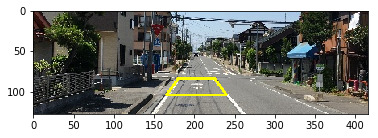

In [9]:
#Showing trapezoid
for number, image in enumerate(file_names[0:1]):
    trapezoid=trapezoids[number]
    img = draw_images(image,trapezoid)
    plt.axis('on')
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    



# Getting Depth map

In [10]:
save_path3="../depth"

Depth map can be obtained [struct2depth_eval](https://github.com/go125/struct2depth_eval).

Please execute the code below in the struct2depth_eval directory.


python inference_dfv.py \
    --logtostderr \
    --file_extension jpg \
    --depth \
    --egomotion false \
    --input_dir ../result_img/ \
    --output_dir ../depth/ \
    --model_ckpt ../cityscapes_kitti_learned_intrinsics/model-1000977

# Length Prediction

In [11]:
def undistort_img():
    # Prepare object points 0,0,0 ... 8,5,0
    obj_pts = np.zeros((4*4,3), np.float32)

    #Changing the unit to meters.
    obj_pts[:,:2] = np.mgrid[0:4, 0:4].T.reshape(-1,2)*0.022
    
    # Stores all object points & img points from all images
    objpoints = []
    imgpoints = []

    
    # Get directory for all calibration images    
    images = glob.glob(save_path2+'/*.jpg')
    

    for indx, fname in enumerate(images):
        img = cv2.imread(fname)
        
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        ret, corners = cv2.findChessboardCorners(gray, (4,4), None)

        if ret == True:
            objpoints.append(obj_pts)
            imgpoints.append(corners)
            
    # Test undistortion on img
    img_size = (img.shape[1], img.shape[0])
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_size, None,None)    
    print(mtx)
    dst = cv2.undistort(img, mtx, dist, None, mtx)
    
    # Save camera calibration for later use
    dist_pickle = {}
    dist_pickle['mtx'] = mtx
    dist_pickle['dist'] = dist
    pickle.dump( dist_pickle, open(save_path2+'calibration1.p', 'wb') )
    
        
def undistort(img, cal_dir=save_path2+'camera_cal/calibration1.p'):
    #cv2.imwrite('camera_cal_old/test_cal.jpg', dst)
    with open(cal_dir, mode='rb') as f:
        file = pickle.load(f)
    mtx = file['mtx']
    dist = file['dist']
    dst = cv2.undistort(img, mtx, dist, None, mtx)
    
    return dst

In [12]:
undistort_img()

[[556.71879181   0.         228.79980912]
 [  0.         561.53318711  65.91793491]
 [  0.           0.           1.        ]]


In [13]:
def get_mtx(cal_dir=save_path2+'calibration1.p'):
    #cv2.imwrite('camera_cal_old/test_cal.jpg', dst)
    with open(cal_dir, mode='rb') as f:
        file = pickle.load(f)
    mtx = file['mtx']
    
    return mtx

In [14]:
mtx=get_mtx()

In [15]:
inv_mtx = np.linalg.inv(mtx)

In [16]:
file_names_2 = []
for file in os.listdir(save_path):
    if os.path.isfile(os.path.join(save_path, file)):
        file2 = file.rstrip('.jpg\n')
        file_names_2.append(file2)

In [17]:
depth_map_dir="../depth/"

i=0

disp_map=np.load(depth_map_dir+file_names_2[i] + '.npy')

In [229]:
disp_map.size

53248

In [230]:
a = cv2.resize(disp_map, (416,128))

In [231]:
depth_map=a

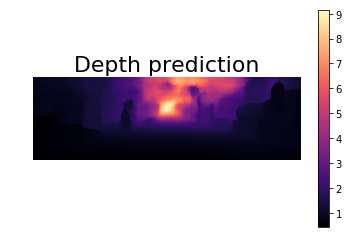

In [232]:
plt.imshow(depth_map, cmap='magma')
plt.title("Depth prediction", fontsize=22)
plt.axis('off')
plt.colorbar()

## Scale matching

In [233]:

import math
height=1.6
theta=88
theta=theta*math.pi/180

In [234]:
truth_z=height/math.cos(theta)

In [235]:
truth_z

45.84593335654997

In [236]:
def calc_center(xmin=1500,ymin=0,img_height=4032,img_width=3024,clip_height=930,clip_width=3024,dfv_height=128,dfv_width=416):
    #xとyが逆かも
    #後で実装
    center_ratio_x=(img_height//2-xmin)/clip_height
    center_ratio_y=(img_width//2-ymin)/clip_width
    center_x=int(dfv_height*center_ratio_x)
    center_y=int(dfv_width*center_ratio_y)
    return [center_x,center_y]

In [237]:
center=calc_center()

In [238]:
print(center[0])
print(center[1])

71
208


In [239]:
prezent_z=depth_map[center[0]][center[1]]
#これだとうまくいかない

In [240]:
prezent_z

2.6357663

In [241]:
y_top=trapezoid[4]
y_bottom=trapezoid[5]

In [242]:
#trapezoid_center=int((trapezoid[4]+trapezoid[5])/2)
#trapezoid_center=trapezoid[5]
#trapezoid_center=104

In [243]:
#trapezoid_center

In [244]:
#prezent_z=depth_map[trapezoid_center][216]
#これだとうまくいく


In [245]:
prezent_z

2.6357663

In [246]:
scalar=truth_z/prezent_z

In [247]:
depth_map=a*scalar

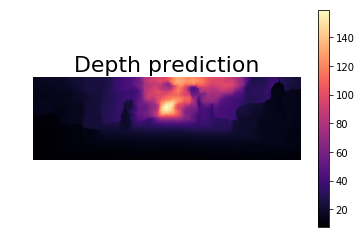

In [248]:
plt.imshow(depth_map, cmap='magma')
plt.title("Depth prediction", fontsize=22)
plt.axis('off')
plt.colorbar()

In [249]:
trapezoid=trapezoids_for_dfv[i]

x_top_left=trapezoid[0]
x_top_right=trapezoid[1]
x_bottom_left=trapezoid[2]
x_bottom_right=trapezoid[3]
y_top=trapezoid[4]
y_bottom=trapezoid[5]

In [250]:
z1=depth_map[y_bottom][x_bottom_right]

In [251]:
z2=depth_map[y_bottom][x_bottom_left]

In [252]:
z3=depth_map[y_top][x_top_left]

In [253]:
z4=depth_map[y_top][x_top_right]

In [254]:
point1=[x_bottom_right,y_bottom,1]

In [255]:
point2=[x_bottom_left,y_bottom,1]

In [256]:
point3=[x_top_left,y_top,1]

In [257]:
point4=[x_top_right,y_top,1]

In [258]:
newpt1=z1*np.dot(inv_mtx,point1)
newpt2=z2*np.dot(inv_mtx,point2)
newpt3=z3*np.dot(inv_mtx,point3)
newpt4=z4*np.dot(inv_mtx,point4)

In [259]:
left_length=np.linalg.norm(newpt2-newpt3, ord=2)

In [260]:
right_length=np.linalg.norm(newpt1-newpt4, ord=2)

In [261]:
width1=np.linalg.norm(newpt2-newpt1, ord=2)

In [262]:
width2=np.linalg.norm(newpt4-newpt3, ord=2)

In [263]:
print(left_length)

9.962624982223831


In [264]:
print(right_length)

9.95153449683837


In [265]:
print(width1)
#bottom length

1.828096030620835


In [266]:
print(width2)
#top length

1.9017726908845913
